# Data Exploration


### Imports

In [26]:
import os
import sys
import numpy as np
import pandas as pd

In [27]:
src_path = os.path.abspath('../src/')
sys.path.append(src_path)

In [28]:
# to allow for all variables to be displayed in jupyter
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [29]:
def correlation_proportion_graph(correlation_matrix, columns, threshold=0.95):
    """
    - Gives proportion of droppable variables
    - Creates a graph mapping proportions of correlation for each level of correlation
    - Returns list of droppable variables
    """
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"{round((len(to_drop)/len(columns))*100, 2)}% of the variables ({len(to_drop)}) are above the {threshold} correlation level.")
    r = np.linspace(0,1,101)
    portion = [len([column for column in upper.columns if any(upper[column] > ratio)])/len(columns) for ratio in r]
    plt.plot(r,portion)
    plt.ylabel("Percentage of Numerical Features")
    plt.xlabel("Level of correlation (absolute)")
    plt.title("Proportions of Correlated Numeric Features")
    plt.show()
    return to_drop

### Data

In [30]:
input_loc = '../data/processed/'
output_loc = '../data/processed/'

In [31]:
df = pd.read_pickle(input_loc + 'macro_engineered.pkl')

### Exploratory Analysis

#### Statistical Description

In [32]:
df.describe(include=np.object).T

,count,unique,top,freq
geoid,87109,87109,#_530530718072,1
name,87109,87109,"Block Group 1, Census Tract 232, Lorain County...",1
county_name,87109,1637,Los Angeles County,1877
state_name,87109,51,New York,8609


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tot_population,87109.0,1459.949523,971.656035,9.000000,885.000000,1249.000000,1779.000000,47727.000000
in_poverty,87109.0,230.055207,232.971667,0.000000,75.000000,164.000000,311.000000,8037.000000
inc_pct_poverty,87109.0,0.171343,0.144658,0.000000,0.060606,0.131440,0.244726,1.000000
inc_pcincome,87109.0,27741.312884,13635.837078,1086.000000,18780.000000,25212.000000,33361.000000,247983.000000
age_pct_under25,87109.0,0.825023,0.118819,0.035186,0.752852,0.820225,0.891778,1.703196
age_pct_25_64,87109.0,0.525344,0.083323,0.010870,0.478565,0.526022,0.573225,1.000000
age_pct_over65,87109.0,0.161251,0.090437,0.000000,0.099723,0.148276,0.204856,0.937198
educ_tot_pop,87109.0,1004.431689,643.267286,17.000000,615.000000,867.000000,1233.000000,39486.000000
educ_no_school,87109.0,0.015265,0.025543,0.000000,0.000000,0.004839,0.020604,0.472262
educ_nursery_4th,87109.0,0.007461,0.019901,0.000000,0.000000,0.000000,0.002791,0.380117


In [56]:
df.describe().T[df.describe().T['max'] > 1].T.iloc[:, :-1].columns

,tot_population,in_poverty,inc_pcincome,age_pct_under25,educ_tot_pop,total_pop_16_plus,house_tot_occ_cnt,total_housing_units,house_tot_owned,house_density,at_least_one_alarm
count,87105.000000,87105.000000,87105.000000,87105.000000,87105.000000,87105.000000,87105.000000,87105.000000,87105.000000,87105.000000,87105.000000
mean,1460.003708,230.064141,27741.383514,0.825017,1004.466586,1182.403846,556.587291,634.235451,360.264646,0.465684,4.093692
std,971.643793,232.973116,13635.625949,0.118797,643.258585,754.504109,340.391780,379.207031,278.810151,0.172358,11.355973
min,9.000000,0.000000,1086.000000,0.035186,17.000000,17.000000,4.000000,11.000000,1.000000,0.033183,0.000000
25%,885.000000,75.000000,18780.000000,0.752852,615.000000,725.000000,349.000000,402.000000,189.000000,0.376471,1.000000
50%,1249.000000,164.000000,25212.000000,0.820218,867.000000,1020.000000,483.000000,552.000000,304.000000,0.438990,1.000000
75%,1779.000000,311.000000,33361.000000,0.891772,1233.000000,1447.000000,678.000000,768.000000,464.000000,0.515750,4.000000
max,47727.000000,8037.000000,247983.000000,1.703196,39486.000000,39592.000000,21429.000000,26526.000000,20473.000000,6.781690,1546.000000


In [48]:
df[df.age_pct_under25 > 1] #likely due to underlying feature miscalculation

,geoid,name,county_name,state_name,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,age_pct_over65,educ_tot_pop,educ_no_school,educ_nursery_4th,educ_5th_6th,educ_7th_8th,educ_9th,educ_10th,educ_11th,educ_12th_no_diploma,educ_high_school_grad,educ_col_less_1_yr,educ_some_col_no_grad,educ_associates,educ_bachelors,educ_masters,educ_professional,educ_docterate,total_pop_16_plus,worked_past_12_mo,did_not_work_past_12_mo,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_amind,race_pct_black,race_pct_hisp,house_tot_occ_cnt,house_pct_family,house_pct_family_married,house_pct_family_male_hh,house_pct_family_female_hh,house_pct_non_family,house_pct_live_alone,house_pct_no_live_alone,total_housing_units,house_pct_occupied,house_pct_vacant,house_pct_ownd_occupied,house_pct_rent_occupied,house_pct_1_room,house_pct_2_room,house_pct_3_room,house_pct_4_room,house_pct_5_room,house_pct_6_room,house_pct_7_room,house_pct_8_room,house_pct_9_plus_room,house_yr_pct_2014_plus,house_yr_pct_2010_2013,house_yr_pct_2000_2009,house_yr_pct_1990_1999,house_yr_pct_1980_1989,house_yr_pct_1970_1979,house_yr_pct_1960_1969,house_yr_pct_1950_1959,house_yr_pct_1940_1949,house_yr_pct_earlier_1939,heat_pct_utility_gas,heat_pct_bottled_tank_lpgas,heat_pct_electricity,heat_pct_fueloil_kerosene,heat_pct_coal,heat_pct_wood,heat_pct_solar,heat_pct_other,heat_pct_no_fuel,house_pct_complete_plumb,house_pct_incomplete_plumb,house_pct_complete_kitchen,house_pct_incomplete_kitchen,house_tot_w_mort,house_w_1_mort,house_w_2_mort,house_w_home_equity_loan,house_w_both_2_mort_and_loan,house_no_mort,house_tot_owned,house_val_less_10k,house_val_10k_15k,house_val_15k_20k,house_val_20k_25k,house_val_25k_30k,house_val_30k_35k,house_val_35k_40k,house_val_40k_50k,house_val_50k_60k,house_val_60k_70k,house_val_70k_80k,house_val_80k_90k,house_val_90k_100k,house_val_100k_125k,house_val_125k_150k,house_val_150k_175k,house_val_175k_200k,house_val_200k_250k,house_val_250k_300k,house_val_300k_400k,house_val_400k_500k,house_val_500k_750k,house_val_750k_1m,house_val_1m_1.5m,house_val_1.5m_2m,house_val_more_2m,house_density_occ,house_density,at_least_one_alarm,visits,occ_housing_visited,visits_one_plus_alarms
1,#_530039603002,"Block Group 2, Census Tract 9603, Asotin Count...",Asotin County,Washington,911,141,0.154775,17883.0,1.062569,0.473106,0.127333,547,0.000000,0.000000,0.000000,0.042048,0.060329,0.014625,0.000000,0.010969,0.226691,0.151737,0.188300,0.111517,0.193784,0.000000,0.000000,0.000000,772,0.674870,0.325130,0.774973,0.767289,0.225027,0.232711,0.173436,0.007684,0.225027,415,0.460241,0.144578,0.048193,0.267470,0.539759,0.481928,0.057831,462,0.898268,0.101732,0.453012,0.546988,0.021645,0.038961,0.190476,0.166667,0.086580,0.268398,0.045455,0.047619,0.134199,0.000000,0.000000,0.000000,0.164502,0.049784,0.108225,0.114719,0.127706,0.216450,0.218615,0.590361,0.036145,0.373494,0.000000,0.0,0.0,0.00000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.595745,0.595745,0.000000,0.000000,0.000000,0.404255,188,0.000000,0.000000,0.000000,0.000000,0.0,0.053191,0.0,0.00000,0.000000,0.111702,0.000000,0.085106,0.202128,0.031915,0.186170,0.170213,0.090426,0.042553,0.000000,0.026596,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.455543,0.507135,1.0,1,0.002410,1.000000
31,#_530050112003,"Block Group 3, Census Tract 112, Benton County...",Benton County,Washington,1484,833,0.561321,12240.0,1.104895,0.355372,0.106167,726,0.071625,0.000000,0.000000,0.005510,0.024793,0.000000,0.000000,0.028926,0.552342,0.048209,0.165289,0.035813,0.059229,0.008264,0.000000,0.000000,950,0.505263,0.494737,0.610299,0.444374,0.389701,0.555626,0.000000,0.003814,0.511125,412,0.779126,0.271845,0.000000,0.507282,0.220874,0.128641,0.092233,412,1.000000,0.000000,0.322816,0.677184,0.000000,0.000000,0.000000,0.223301,0.412621,0.063107,0.169903,0.000000,0.131068,0.000000,0.000000,0.114078,0.000000,0.046117,0.128641,0.099515,0.524272,0.065534,0.021845,0.099515,0.000000,0.900485,0.0000

In [49]:
df[df.house_density > 1]

,geoid,name,county_name,state_name,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,age_pct_over65,educ_tot_pop,educ_no_school,educ_nursery_4th,educ_5th_6th,educ_7th_8th,educ_9th,educ_10th,educ_11th,educ_12th_no_diploma,educ_high_school_grad,educ_col_less_1_yr,educ_some_col_no_grad,educ_associates,educ_bachelors,educ_masters,educ_professional,educ_docterate,total_pop_16_plus,worked_past_12_mo,did_not_work_past_12_mo,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_amind,race_pct_black,race_pct_hisp,house_tot_occ_cnt,house_pct_family,house_pct_family_married,house_pct_family_male_hh,house_pct_family_female_hh,house_pct_non_family,house_pct_live_alone,house_pct_no_live_alone,total_housing_units,house_pct_occupied,house_pct_vacant,house_pct_ownd_occupied,house_pct_rent_occupied,house_pct_1_room,house_pct_2_room,house_pct_3_room,house_pct_4_room,house_pct_5_room,house_pct_6_room,house_pct_7_room,house_pct_8_room,house_pct_9_plus_room,house_yr_pct_2014_plus,house_yr_pct_2010_2013,house_yr_pct_2000_2009,house_yr_pct_1990_1999,house_yr_pct_1980_1989,house_yr_pct_1970_1979,house_yr_pct_1960_1969,house_yr_pct_1950_1959,house_yr_pct_1940_1949,house_yr_pct_earlier_1939,heat_pct_utility_gas,heat_pct_bottled_tank_lpgas,heat_pct_electricity,heat_pct_fueloil_kerosene,heat_pct_coal,heat_pct_wood,heat_pct_solar,heat_pct_other,heat_pct_no_fuel,house_pct_complete_plumb,house_pct_incomplete_plumb,house_pct_complete_kitchen,house_pct_incomplete_kitchen,house_tot_w_mort,house_w_1_mort,house_w_2_mort,house_w_home_equity_loan,house_w_both_2_mort_and_loan,house_no_mort,house_tot_owned,house_val_less_10k,house_val_10k_15k,house_val_15k_20k,house_val_20k_25k,house_val_25k_30k,house_val_30k_35k,house_val_35k_40k,house_val_40k_50k,house_val_50k_60k,house_val_60k_70k,house_val_70k_80k,house_val_80k_90k,house_val_90k_100k,house_val_100k_125k,house_val_125k_150k,house_val_150k_175k,house_val_175k_200k,house_val_200k_250k,house_val_250k_300k,house_val_300k_400k,house_val_400k_500k,house_val_500k_750k,house_val_750k_1m,house_val_1m_1.5m,house_val_1.5m_2m,house_val_more_2m,house_density_occ,house_density,at_least_one_alarm,visits,occ_housing_visited,visits_one_plus_alarms
44,#_530079601002,"Block Group 2, Census Tract 9601, Chelan Count...",Chelan County,Washington,739,188,0.254398,26795.0,0.568000,0.496000,0.400000,672,0.000000,0.03125,0.004464,0.017857,0.017857,0.038690,0.041667,0.019345,0.288690,0.062500,0.180060,0.043155,0.110119,0.107143,0.005952,0.031250,713,0.415147,0.584853,0.936000,0.898667,0.064000,0.101333,0.018667,0.000000,0.044000,369,0.571816,0.520325,0.021680,0.029810,0.428184,0.352304,0.075881,851,0.433608,0.566392,0.739837,0.260163,0.044653,0.091657,0.105758,0.279671,0.153937,0.159812,0.057579,0.024677,0.082256,0.000000,0.005875,0.129260,0.131610,0.069330,0.183314,0.178613,0.092832,0.059929,0.149236,0.029810,0.000000,0.875339,0.016260,0.0,0.078591,0.0,0.000000,0.000000,0.833137,0.166863,0.848414,0.151586,0.534799,0.494505,0.000000,0.040293,0.000000,0.465201,273,0.021978,0.000000,0.000000,0.000000,0.018315,0.000000,0.000000,0.000000,0.000000,0.000000,0.029304,0.000000,0.084249,0.040293,0.021978,0.029304,0.043956,0.051282,0.223443,0.201465,0.139194,0.080586,0.014652,0.000000,0.000000,0.000000,0.499323,1.151556,1.0,1,0.002710,1.00000
45,#_530079602001,"Block Group 1, Census Tract 9602, Chelan Count...",Chelan County,Washington,955,266,0.278534,22075.0,0.652129,0.370717,0.489097,828,0.000000,0.00000,0.000000,0.038647,0.000000,0.000000,0.000000,0.091787,0.341787,0.076087,0.097826,0.049517,0.170290,0.083333,0.050725,0.000000,925,0.390270,0.609730,0.932503,0.932503,0.067497,0.067497,0.034268,0.033229,0.000000,493,0.523327,0.468560,0.022312,0.032454,0.476673,0.363083,0.113590,1894,0.260296,0.739704,0.896552,0.103448,0.008448,0.036959,0.054382,0.274023,0.209081,0.331045,0.036431,0.008976,0.040655,0.079197,0.052270,0.184794,0.226505,0.159451,0.140971,0.022703,0.100317,0.007392,0.026399,0.0

In [34]:
df = df.loc[df.occ_housing_visited <= 1]

#### Correlation

In [35]:
corr_matrix = df.corr().abs()

12.3% of the variables (15) are above the 0.9 correlation level.


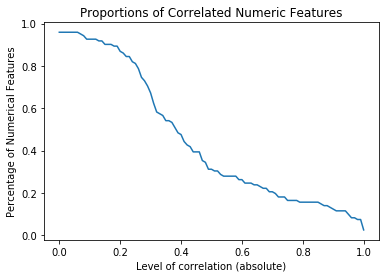

['educ_tot_pop',
 'total_pop_16_plus',
 'did_not_work_past_12_mo',
 'race_pct_nonwhite',
 'race_pct_nonwhitenh',
 'house_tot_occ_cnt',
 'house_pct_non_family',
 'house_pct_live_alone',
 'total_housing_units',
 'house_pct_vacant',
 'house_pct_rent_occupied',
 'house_pct_incomplete_plumb',
 'house_pct_incomplete_kitchen',
 'house_no_mort',
 'visits']

In [57]:
correlation_proportion_graph(corr_matrix, df.columns, 0.9)

*Possibly drop these later after baseline modeling in next notebook*

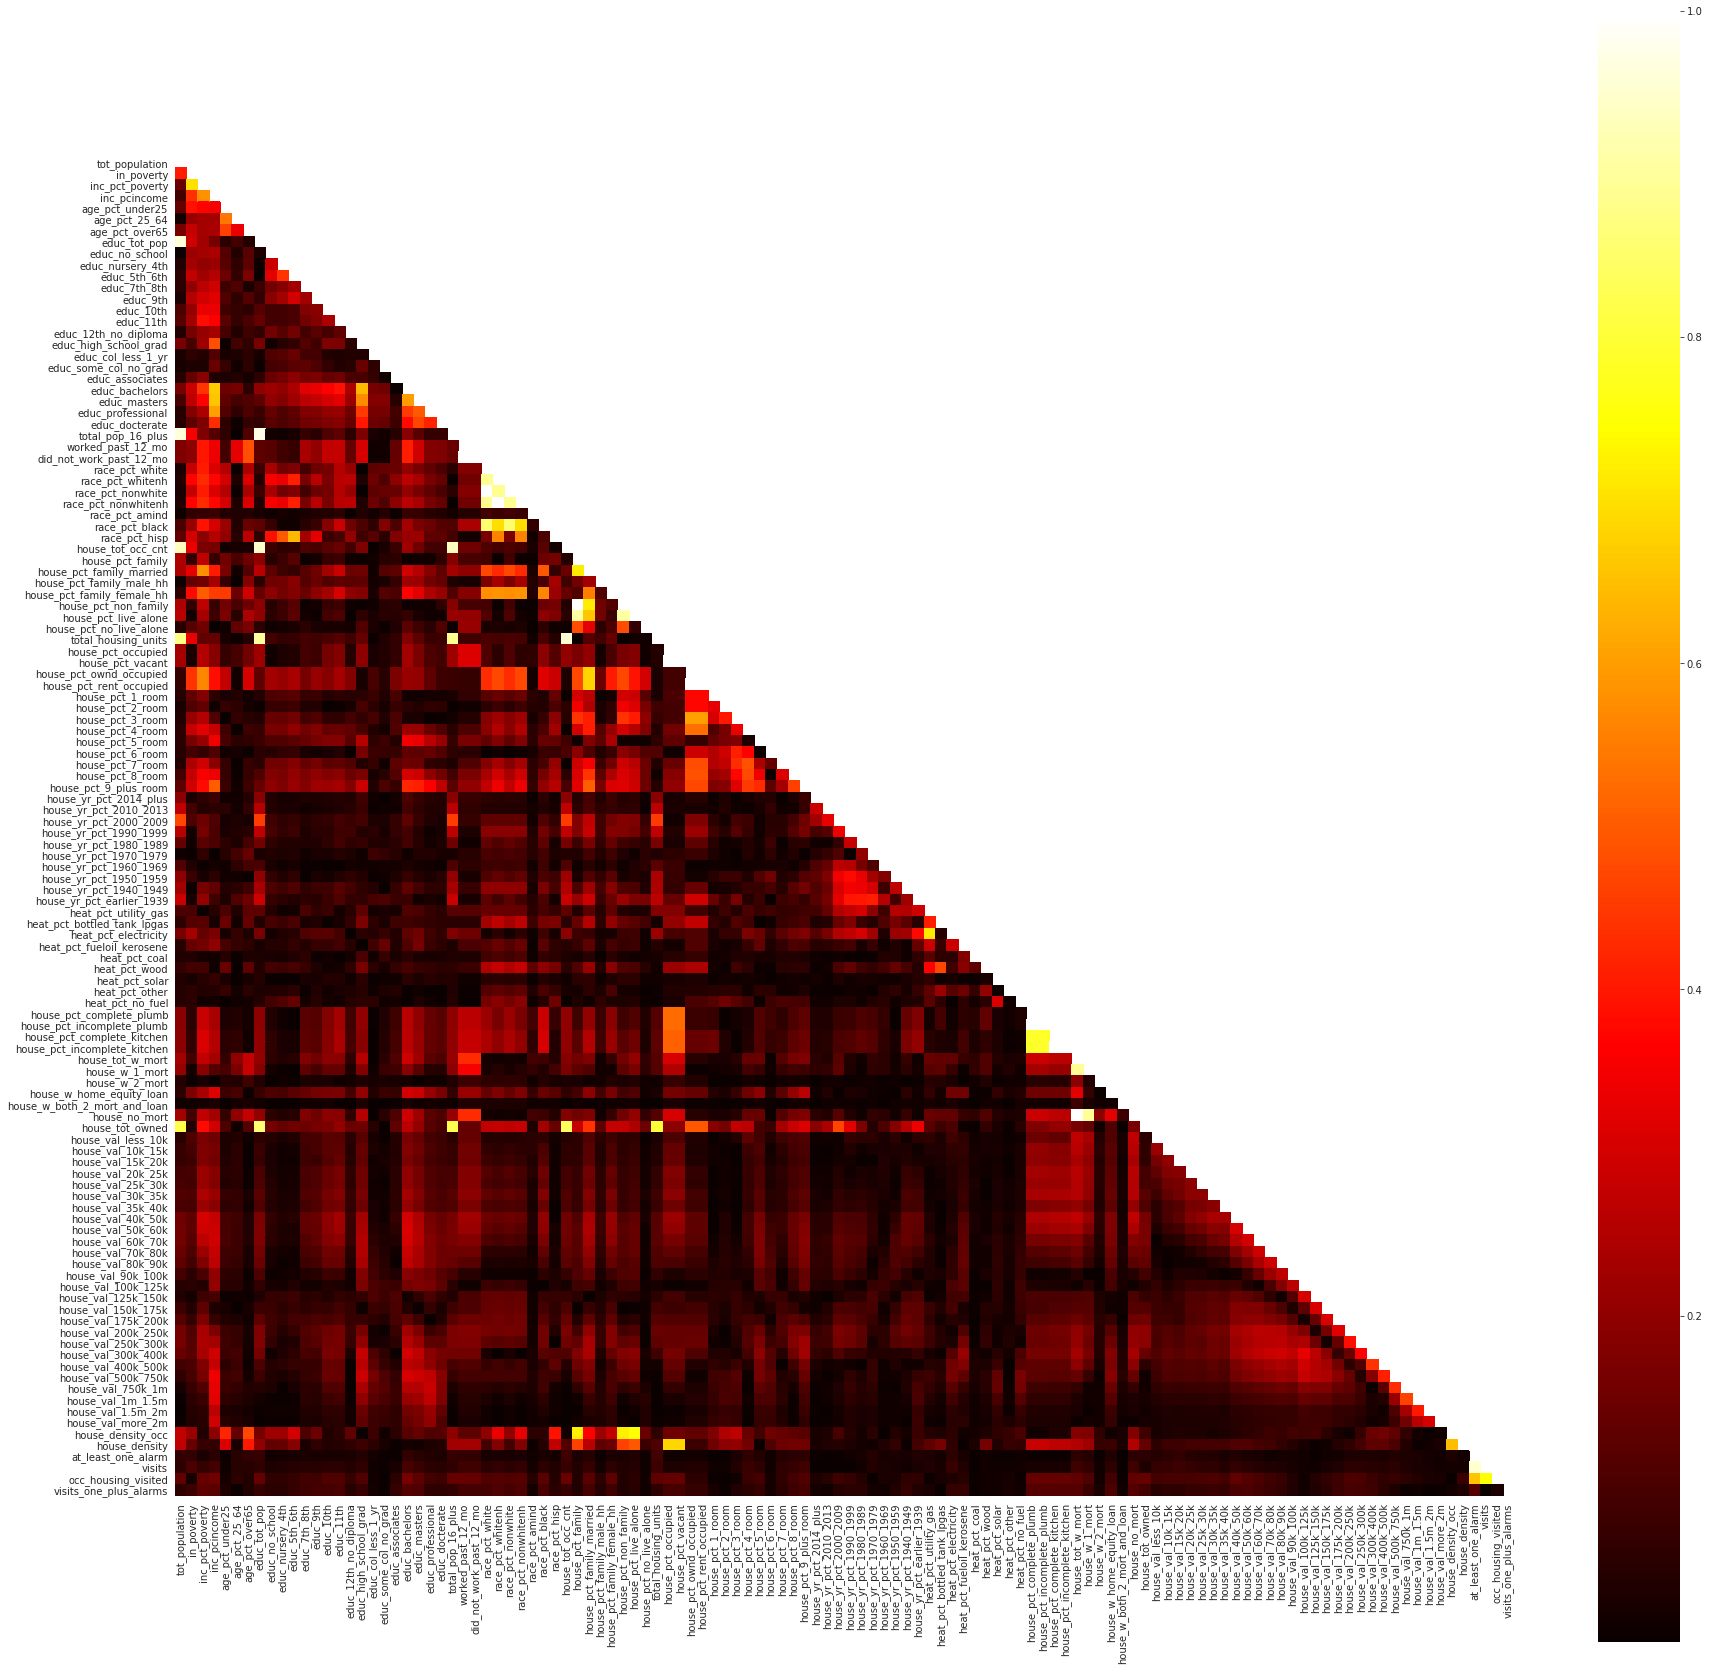

In [58]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix, mask=mask, square=True, cmap="hot")
plt.show()

In [59]:
corr_matrix.visits_one_plus_alarms.sort_values(ascending=False)

visits_one_plus_alarms          1.000000
inc_pct_poverty                 0.127522
inc_pcincome                    0.117393
house_pct_complete_plumb        0.113299
house_pct_incomplete_plumb      0.113299
house_tot_w_mort                0.112311
house_no_mort                   0.112311
at_least_one_alarm              0.111369
house_pct_complete_kitchen      0.109974
house_pct_incomplete_kitchen    0.109974
educ_bachelors                  0.109873
race_pct_whitenh                0.105206
race_pct_nonwhitenh             0.105206
educ_masters                    0.104361
house_w_home_equity_loan        0.099097
house_val_50k_60k               0.098750
race_pct_black                  0.097490
house_val_40k_50k               0.096545
educ_11th                       0.094681
house_pct_occupied              0.093649
house_pct_vacant                0.093649
house_pct_9_plus_room           0.092397
house_pct_family_married        0.090472
house_val_200k_250k             0.090423
worked_past_12_m

#### Variance
Look at the variance for each variable and consider the following:
- Do any variables have very low variance (and how do you define "low")?
- Should you keep these variables in the set for model training?

In [60]:
df.var().sort_values(ascending=False)[1:]

tot_population                  944091.660358
total_pop_16_plus               569276.450139
educ_tot_pop                    413781.607102
total_housing_units             143797.972540
house_tot_occ_cnt               115866.563585
house_tot_owned                  77735.100218
in_poverty                       54276.473005
visits                             219.574989
at_least_one_alarm                 128.958123
visits_one_plus_alarms               0.136172
race_pct_whitenh                     0.106645
race_pct_nonwhitenh                  0.106645
heat_pct_utility_gas                 0.102829
race_pct_white                       0.084127
race_pct_nonwhite                    0.084127
heat_pct_electricity                 0.080887
race_pct_black                       0.069918
house_pct_ownd_occupied              0.056039
house_pct_rent_occupied              0.056039
house_yr_pct_earlier_1939            0.049727
race_pct_hisp                        0.044714
house_tot_w_mort                  

#### Outliers
##### Boxplot

In [70]:
numeric_acs_columns = df.describe().T[df.describe().T['max'] > 1].T.drop(columns=['house_density', 'at_least_one_alarm', 'visits']).columns.to_list()
remaining = [var for var in df.columns if var not in numeric_acs_columns] 
housing_variables = [var for var in remaining if var.find('hous') != -1]
race_variables = [var for var in remaining if var.find('race') != -1]
educ_variables = [var for var in remaining if var.find('educ') != -1]
income_variables = [var for var in remaining if var.find('pov') != -1]

['inc_pct_poverty']

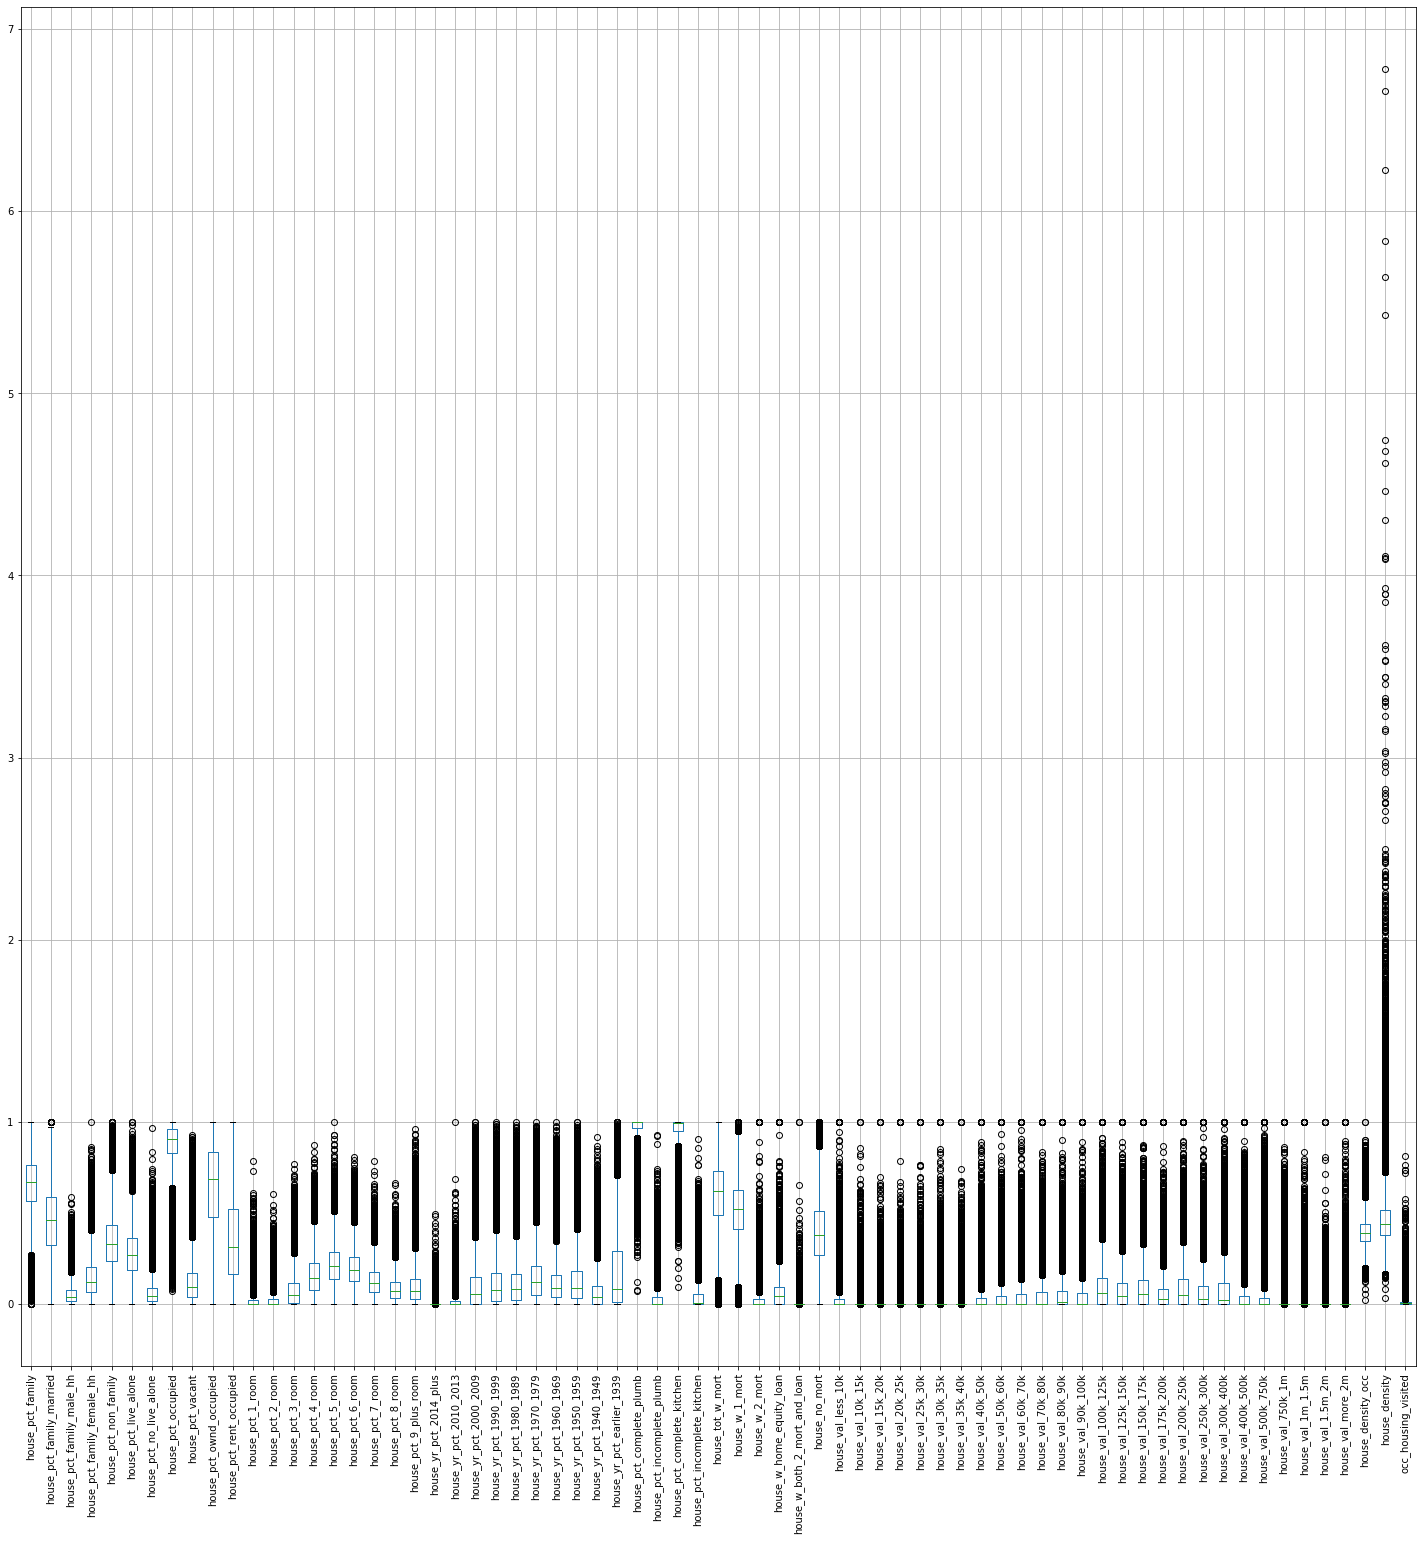

In [75]:
df[housing_variables].boxplot(figsize=(25,25))
plt.xticks(rotation=90)
plt.show()

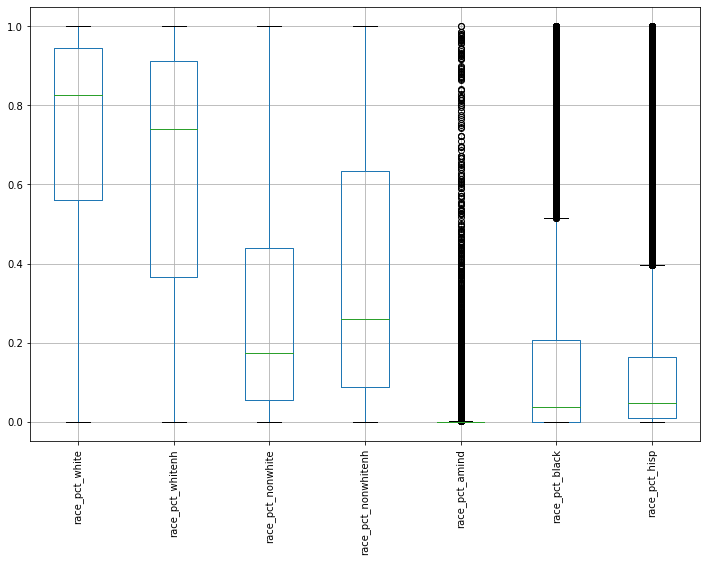

In [80]:
df[race_variables].boxplot(figsize=(12,8))
plt.xticks(rotation=90)
plt.show()

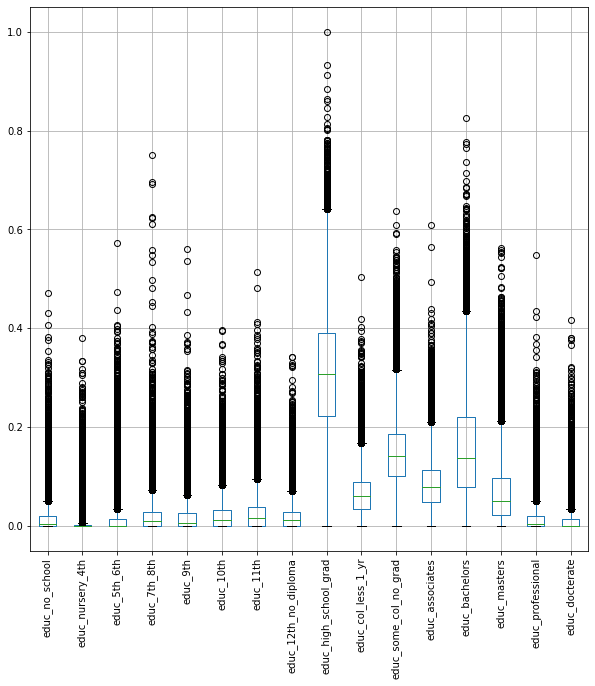

In [81]:
df[educ_variables].boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

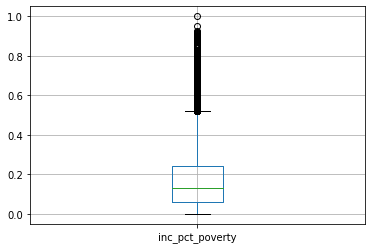

In [84]:
df[income_variables].boxplot();

#### Distributions

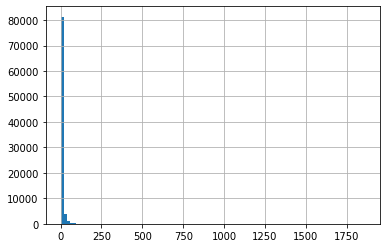

In [100]:
df.visits.hist(bins=100);

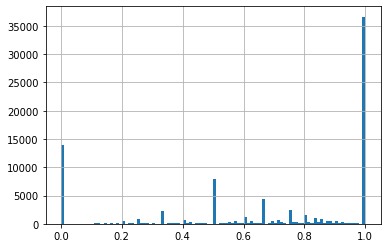

In [101]:
df.visits_one_plus_alarms.hist(bins=100);

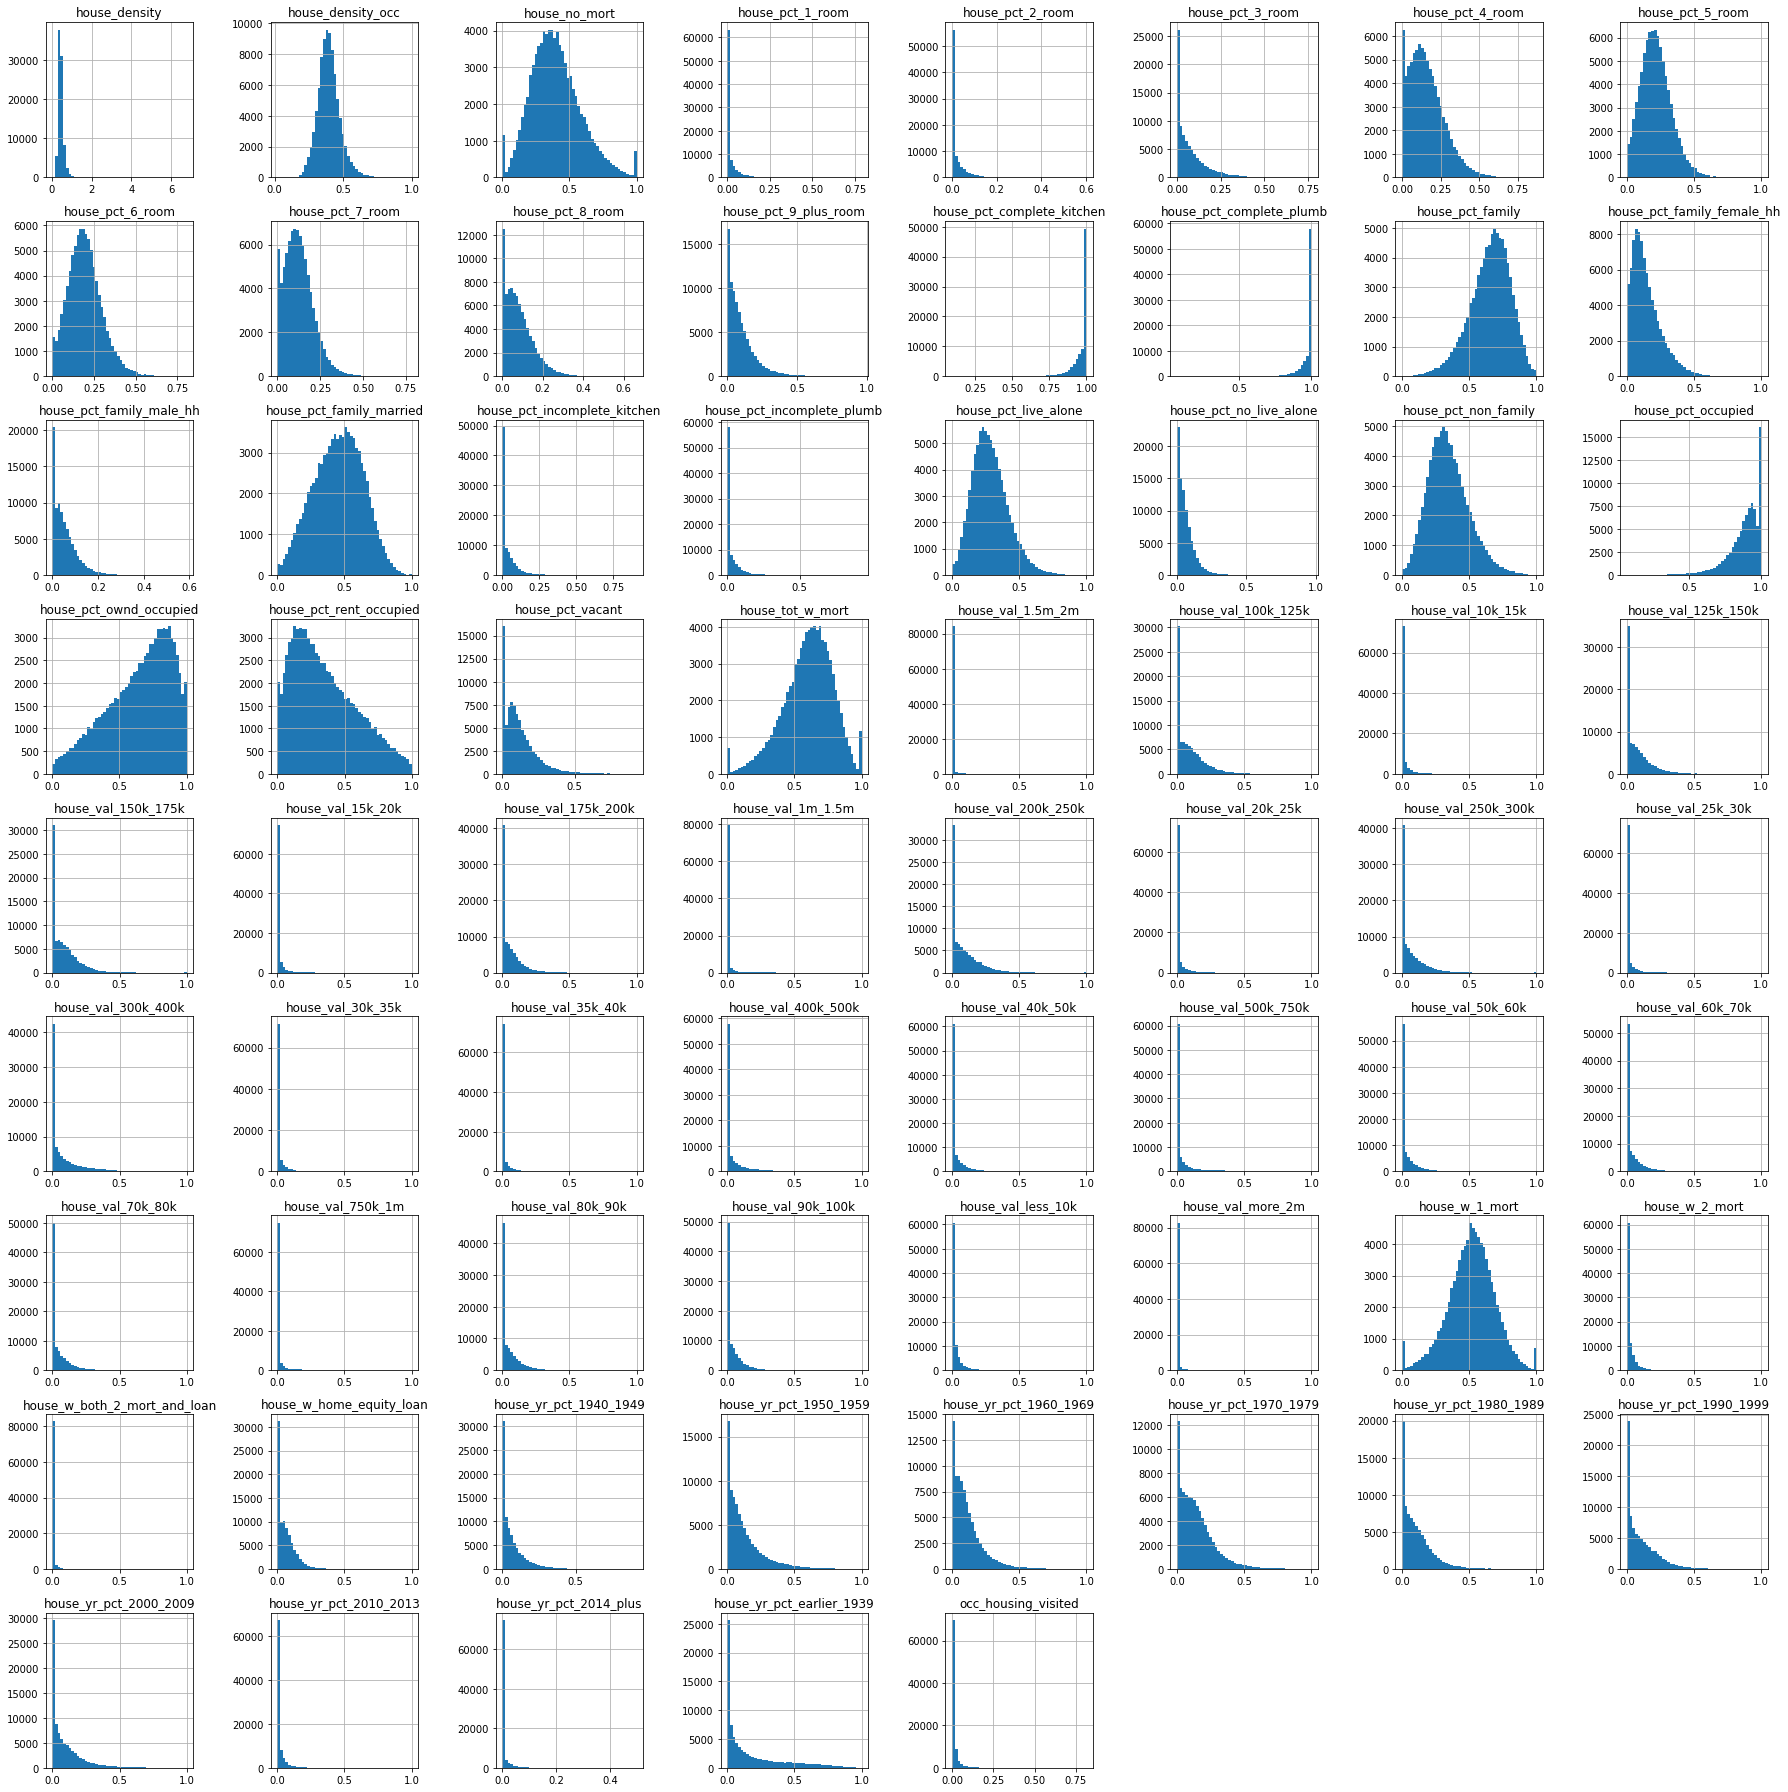

In [88]:
df[housing_variables].hist(bins=50, figsize=(25,25))
plt.tight_layout()
plt.show()

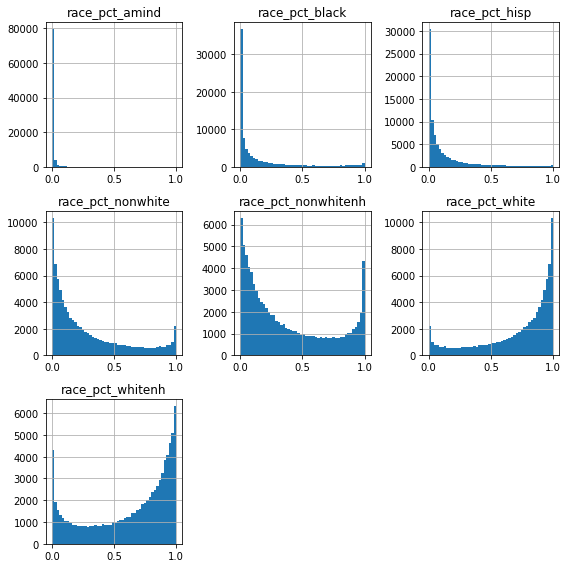

In [94]:
df[race_variables].hist(bins=50, figsize=(8,8))
plt.tight_layout()
plt.show()

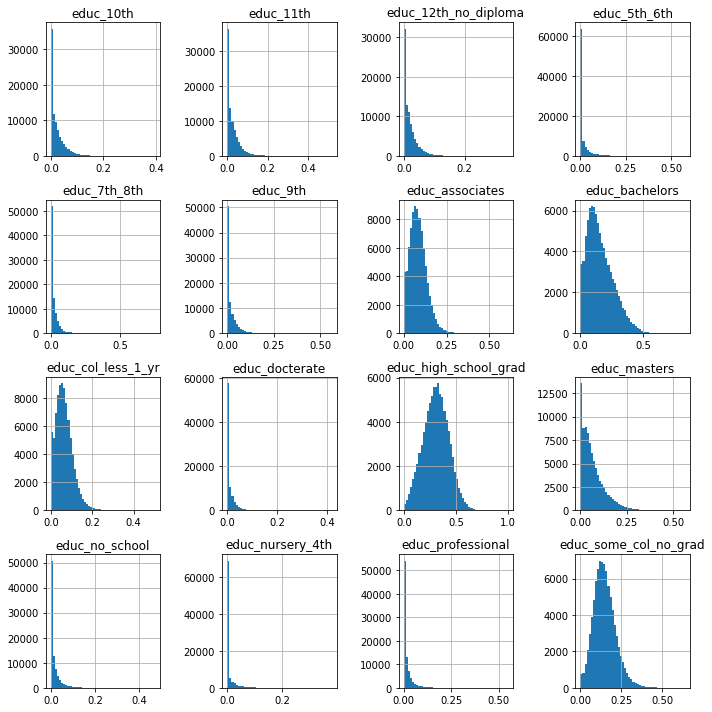

In [95]:
df[educ_variables].hist(bins=50, figsize=(10,10))
plt.tight_layout()
plt.show()

### Additional Understanding